# MANE 6399 - Data Science

## Week Thirteen

## Classification

# Jupyter Example 1 

## K-Nearest Neighbor Classifier

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
# read excel file into dataframe
df1 = pd.read_excel(open('wpbc.data.xlsx','rb'))
df1=df1.dropna(axis=0,how='any')       # remove rows with missing values
df1.drop('id', axis=1, inplace=True)   # drop column with patient ids
print(df1.head())
# create endogenous and exogenous variables
X = np.array(df1.iloc[:, 1:14])
y = np.array(df1['recurrence'])
# split and transform data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
#
nn1=neighbors.KNeighborsClassifier(n_neighbors=5)
nn1.fit(X_train_transformed,y_train)
print("training set accuracy is %f"%nn1.score(X_train_transformed,y_train))
print("testing set accuracy is %f"%nn1.score(X_test_transformed,y_test))

  outcome  time  radius  texture  perimeter    area  smoothness  compactness  \
0       N    31   18.02    27.60     117.50  1013.0     0.09489       0.1036   
1       N    61   17.99    10.38     122.80  1001.0     0.11840       0.2776   
2       N   116   21.37    17.44     137.50  1373.0     0.08836       0.1189   
3       N   123   11.42    20.38      77.58   386.1     0.14250       0.2839   
4       R    27   20.29    14.34     135.10  1297.0     0.10030       0.1328   

   concavity  concavePoints  symmetry  fractal  tumorSize  LymphStatus  \
0     0.1086        0.07055    0.1865  0.06333        5.0            5   
1     0.3001        0.14710    0.2419  0.07871        3.0            2   
2     0.1255        0.08180    0.2333  0.06010        2.5            0   
3     0.2414        0.10520    0.2597  0.09744        2.0            0   
4     0.1980        0.10430    0.1809  0.05883        3.5            0   

   recurrence  
0           0  
1           0  
2           0  
3         

# Jupter Example 2

## Finding Optimal *k*

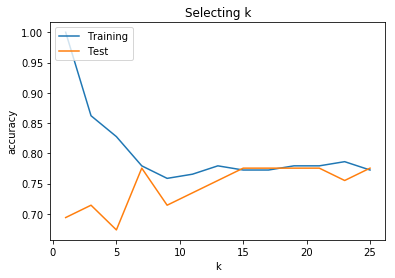

In [9]:
from matplotlib import pyplot as plt
ind=[]
test=[]
train=[]
for i in range(1,26,2):
    nn1=neighbors.KNeighborsClassifier(n_neighbors=i)
    nn1.fit(X_train_transformed,y_train)
    ind.append(i)
    train.append(nn1.score(X_train_transformed,y_train))
    test.append(nn1.score(X_test_transformed,y_test))
#print(train)
plt.plot(ind,train,label='Training')
plt.plot(ind,test,label='Test')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.title('Selecting k')
plt.show()

# Jupyter Example 3

## Generating Confusion Matrix

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
nn2=neighbors.KNeighborsClassifier(n_neighbors=9)
nn2.fit(X_train_transformed,y_train)
y_pred_test=nn2.predict(X_test_transformed)
cm=confusion_matrix(y_test,y_pred_test)
print(cm)


[[35  2]
 [12  0]]


# Jupyter Example 4

## Cross-validation

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
clf = make_pipeline(preprocessing.StandardScaler(), neighbors.KNeighborsClassifier(n_neighbors=9))
scores=cross_val_score(clf, X, y, cv=5)
print(scores)
print(np.average(scores))

[0.75 0.77 0.74 0.76 0.76]
0.7578272604588394


# Jupyter Example 5

## Classification with more than 2 classes

Confusion matrix, without normalization
[[35  2]
 [12  0]]
Normalized confusion matrix
[[0.95 0.05]
 [1.   0.  ]]


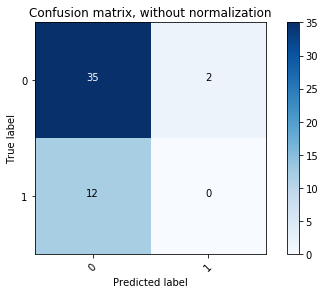

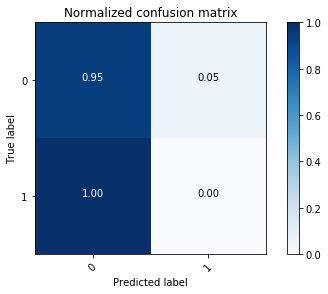

In [12]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names=['0','1']
cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

        ri     na    mg    al     si     k    ca   ba   fe  type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


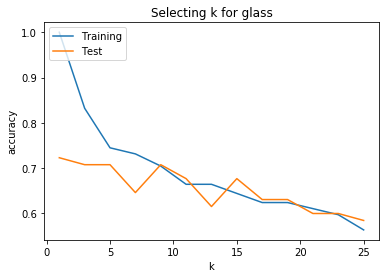

[[14  3  0  0  0  0]
 [15 13  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  3  0  0  0  1]
 [ 2  0  0  0  0  0]
 [ 0  1  0  0  0 11]]
Confusion matrix, without normalization
[[14  3  0  0  0  0]
 [15 13  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  3  0  0  0  1]
 [ 2  0  0  0  0  0]
 [ 0  1  0  0  0 11]]
Normalized confusion matrix
[[0.82 0.18 0.   0.   0.   0.  ]
 [0.54 0.46 0.   0.   0.   0.  ]
 [0.5  0.5  0.   0.   0.   0.  ]
 [0.   0.75 0.   0.   0.   0.25]
 [1.   0.   0.   0.   0.   0.  ]
 [0.   0.08 0.   0.   0.   0.92]]


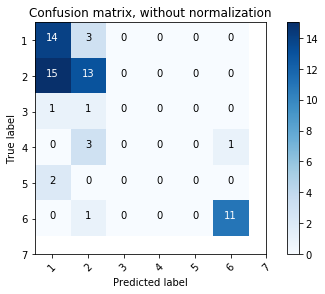

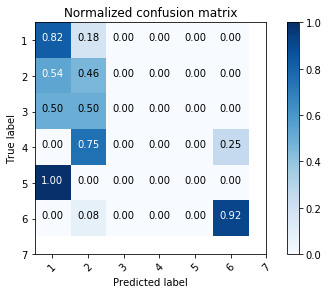

In [13]:
# read excel file into dataframe
df2 = pd.read_excel(open('glass.data.xlsx','rb'))
df2=df2.dropna(axis=0,how='any')       # remove rows with missing values
df2.drop('id', axis=1, inplace=True)   # drop column with patient ids
print(df2.head())
# create endogenous and exogenous variables
gX = np.array(df2.iloc[:, 0:9])
gy = np.array(df2['type'])
gX_train, gX_test, gy_train, gy_test = train_test_split(gX, gy, test_size=0.3)
gscaler = preprocessing.StandardScaler().fit(gX_train)
gX_train_transformed = gscaler.transform(gX_train)
gX_test_transformed = gscaler.transform(gX_test)
ind=[]
test=[]
train=[]
for i in range(1,26,2):
    nn2=neighbors.KNeighborsClassifier(n_neighbors=i)
    nn2.fit(gX_train_transformed,gy_train)
    ind.append(i)
    train.append(nn2.score(gX_train_transformed,gy_train))
    test.append(nn2.score(gX_test_transformed,gy_test))
#print(train)


plt.plot(ind,train,label='Training')
plt.plot(ind,test,label='Test')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.title('Selecting k for glass')
plt.show()
#
nn3=neighbors.KNeighborsClassifier(n_neighbors=1)
nn3.fit(gX_train_transformed,gy_train)
gy_pred_test=nn2.predict(gX_test_transformed)
cm3=confusion_matrix(gy_test,gy_pred_test)
print(cm3)
#
class_names=['1','2','3','4','5','6','7']
cnf_matrix = confusion_matrix(gy_test, gy_pred_test)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()